## Heatmap

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
import os

> ## Vitamin D Stimulation

In [2]:
df = pd.read_csv('Supplementary/de_genes_vitd_rich.csv')#.set_index(['Unnamed: 0'])
df.columns = ['Genes'] + list(df.columns[1:].values)
df = df.set_index('Genes')
meta = pd.read_csv("Data/Th2+-VitD/Th2_metadata.csv", sep=';')
meta = meta.sort_values(by=['condition'])
df = df[meta.X]
meta.loc[meta.condition == 'control','condition'] = 'Control'


In [3]:
sample = 'X'
diet = 'condition'
df_colors = meta[[sample, diet]]
df_colors['Patients'] = df_colors.index.values
df_colors = df_colors.set_index([sample])
colors = {'Control':'#c3d2bd',
             'Vitamin D': '#fbb19f'}
rcolors = meta[diet].map(colors)


/udd/revfa/.conda/envs/cdnm-jupyter-python-3.7.6-R/lib/python3.7/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


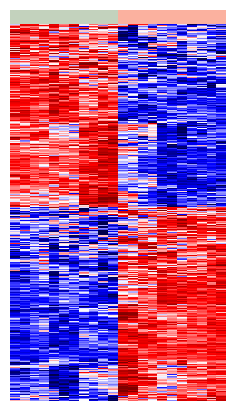

In [4]:
sns.set(font_scale= 0.3)
annot_kws={'fontsize':8, 
           'color':'#0cff0c',
            'weight': 'bold',
           "size": 16
          }

res = sns.clustermap(df,
                    figsize = (3,5),
                    row_cluster = True,
                    col_cluster = True,
                     fmt = '', 
                     annot_kws= annot_kws,
                     cmap = 'seismic',
                     col_colors = rcolors.values,
                     center = 0,
                      z_score = 0,
                     xticklabels = False,
                     yticklabels=False, 
                    vmin = -2, vmax = 2,
                    cbar_pos=(.12, .32, .03, .2))
               

res.ax_row_dendrogram.set_visible(False)
res.ax_col_dendrogram.set_visible(False)
res.ax_heatmap.set_xlabel('')
res.ax_heatmap.set_ylabel('', fontsize= 16)
res.cax.set_visible(False)


plt.savefig('Figures/Fig3B_heatmap.png',  bbox_inches='tight')

> ## Vitamin D deficient cells

In [5]:
df = pd.read_csv('Supplementary/de_genes_vitd_def.csv')#.set_index(['Unnamed: 0'])
df.columns = ['Genes'] + list(df.columns[1:].values)
df = df.set_index('Genes')
meta = pd.read_csv("Data/WT-VitDdef-VDRKO-Th2/metadata_Th2-WT-Def-KO.csv")
meta = meta[meta.diet != 'Rescue']
df = df[meta.SAMPLEID]

In [6]:
df_colors = meta[['SAMPLEID', 'diet']]
df_colors['Patients'] = df_colors.index.values
df_colors = df_colors.set_index(['SAMPLEID'])
colors = {'regular':'#c3d2bd',
             'Vit-D deficient':'#8cccc6'}
rcolors = meta['diet'].map(colors)

/udd/revfa/.conda/envs/cdnm-jupyter-python-3.7.6-R/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


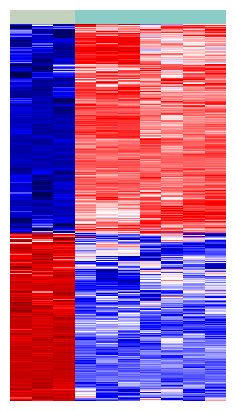

In [7]:
sns.set(font_scale= 0.3)
annot_kws={'fontsize':8, 
           'color':'#0cff0c',
            'weight': 'bold',
           "size": 16
          }

res = sns.clustermap(df,
                    figsize = (3,5),
                    row_cluster = True,
                    col_cluster = True,
                     fmt = '', 
                     annot_kws= annot_kws,
                     cmap =  'seismic',
                     col_colors = rcolors.values,
                     center = 0,
                      z_score = 0,
                     xticklabels = False,
                     yticklabels=False, 
                    vmin = -2, vmax = 2,
                    cbar_pos=(.12, .32, .03, .2))

res.ax_row_dendrogram.set_visible(False)
res.ax_col_dendrogram.set_visible(False)
res.ax_heatmap.set_xlabel('')
res.ax_heatmap.set_ylabel('', fontsize= 16)
res.cax.set_visible(False)
plt.savefig('Figures/Fig5B.png',  bbox_inches='tight')